In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from fugue_notebook import setup

C:\Users\phamp\AppData\Roaming\Python\Python39\site-packages\fugue_sql\__init__.py:8: UserWarning: fsql and FugueSQLWorkflow now should be imported directly from fugue, fugue_sql will be removed in 0.9.0
  warnings.warn(


In [3]:
setup()

<IPython.core.display.Javascript object>

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
%%fsql
-- BROADCAST and PERSIST example
df = CREATE [[1,"1"],[2,"2"],[3,"3"],[4,"4"],[5,"5"]] SCHEMA a:double,b:str
df2 = TAKE 2 ROWS FROM df BROADCAST PRINT
df3 = TAKE 2 ROWS FROM df PERSIST PRINT

,a:double,b:str
0,1.0,1
1,2.0,2


,a:double,b:str
0,1.0,1
1,2.0,2


In [6]:
%%fsql
SELECT *
FROM iris
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Lưu dữ liệu vào file csv

In [8]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE 'D:/MDS4/data/iris.csv' (header=true)

### Lưu dữ liệu vào file json

In [9]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE 'D:/MDS4/data/iris.json'

### Lưu dữ liệu vào file parquet

In [10]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE 'D:/MDS4/data/iris.parquet'

In [13]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE PARQUET 'D:/MDS4/data/iris2'

In [26]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE PARQUET 'D:/MDS4/data/iris3.pq'

### Lưu dữ liệu vào file Avro

In [15]:
%%fsql
SELECT *
FROM iris
SAVE OVERWRITE 'D:/MDS4/data/iris.avro'

### đọc dữ liệu từ file CSV

In [16]:
%%fsql
LOAD 'D:/MDS4/data/iris.csv' (header=true)
PRINT

,sepal_length:str,sepal_width:str,petal_length:str,petal_width:str,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [17]:
%%fsql
LOAD 'D:/MDS4/data/iris.csv' (header=true, infer_schema=TRUE)
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [21]:
%%fsql
LOAD 'data/iris.csv' (header=true)
COLUMNS sepal_length:float, sepal_width:float, petal_length:float, petal_width:float, species:str
PRINT

,sepal_length:float,sepal_width:float,petal_length:float,petal_width:float,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Đọc dữ liệu từ file JSON

In [22]:
%%fsql
LOAD 'data/iris.json'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Đọc dữ liệu từ file Parquet

In [23]:
%%fsql
LOAD 'data/iris.parquet'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [25]:
%%fsql
LOAD PARQUET 'data/iris2'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [28]:
%%fsql
LOAD PARQUET 'data/iris3.pq'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Đọc dữ liệu từ file Avro

In [30]:
%%fsql
LOAD 'D:/MDS4/data/iris.avro'
PRINT

,sepal_length:double,sepal_width:double,petal_length:double,petal_width:double,species:str
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Gọi hàm trong FugueSQL

In [34]:
# from fugue._utils.display import List, Any
from typing import List, Any

In [35]:
def tao_bang(lst1:List[int], lst2:List[Any]) -> List[List[Any]]:
    lst_kq = []
    for i in range(len(lst1)):
        lst_kq.append([lst1[i], lst2[i]])
    return lst_kq

In [39]:
%%fsql
CREATE USING tao_bang(lst1=[1, 2], lst2=['Hello', 'World'])
SCHEMA num:int, name:str
PRINT

,num:int,name:str
0,1,Hello
1,2,World


#### Định nghĩa cấu trúc các cột lúc tạo hàm

In [47]:
#schema: stt:int, ten:str
def tao_bang2(lst1:List[int], lst2:List[Any]) -> List[List[Any]]:
    lst_kq = []
    for i in range(len(lst1)):
        lst_kq.append([lst1[i], lst2[i]])
    return lst_kq

In [48]:
%%fsql
CREATE USING tao_bang2(lst1=[1, 2], lst2=['Hello', 'World'])
PRINT

,stt:int,ten:str
0,1,Hello
1,2,World


In [49]:
# tạo hàm trả về DataFrame

In [50]:
def tao_bang3(lst1:List[int], lst2:List[Any]) -> pd.DataFrame:
    df = pd.DataFrame({
        'stt': lst1,
        'ten': lst2
    })
    return df

In [51]:
%%fsql
CREATE USING tao_bang3(lst1=[1, 2], lst2=['Hello', 'World'])
PRINT

,stt:long,ten:str
0,1,Hello
1,2,World


## Trực quan hóa dữ liệu với FugueSQL

In [52]:
%%fsql
LOAD 'data/covid19.parquet'
PRINT

,key:str,country:str,state:str,city:str,Population:long,date:str,confirmed:long,death:long
0,"Autauga, Alabama, US",US,Alabama,Autauga,55869,2020-01-22,0,0
1,"Baldwin, Alabama, US",US,Alabama,Baldwin,223234,2020-01-22,0,0
2,"Barbour, Alabama, US",US,Alabama,Barbour,24686,2020-01-22,0,0
3,"Bibb, Alabama, US",US,Alabama,Bibb,22394,2020-01-22,0,0
4,"Blount, Alabama, US",US,Alabama,Blount,57826,2020-01-22,0,0
5,"Bullock, Alabama, US",US,Alabama,Bullock,10101,2020-01-22,0,0
6,"Butler, Alabama, US",US,Alabama,Butler,19448,2020-01-22,0,0
7,"Calhoun, Alabama, US",US,Alabama,Calhoun,113605,2020-01-22,0,0
8,"Chambers, Alabama, US",US,Alabama,Chambers,33254,2020-01-22,0,0
9,"Cherokee, Alabama, US",US,Alabama,Cherokee,26196,2020-01-22,0,0


In [55]:
# Xây dựng hàm vẽ biểu đồ lineplot
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def vebieudo(df:pd.DataFrame, x_col:str, y_col:str, title:str, x_title:str, y_title:str) -> None:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.title(title, fontsize=14, color='blue')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

In [66]:
%%fsql
LOAD 'data/covid_19_data.parquet'
SELECT *
WHERE Country = 'Vietnam'
PRINT

,ObservationDate:datetime,State:null,Country:str,Confirmed:int,Deaths:int,Recovered:int
81,2020-01-23,None,Vietnam,2,0,0
127,2020-01-24,None,Vietnam,2,0,0
170,2020-01-25,None,Vietnam,2,0,0
218,2020-01-26,None,Vietnam,2,0,0
267,2020-01-27,None,Vietnam,2,0,0
320,2020-01-28,None,Vietnam,2,0,0
374,2020-01-29,None,Vietnam,2,0,0
431,2020-01-30,None,Vietnam,2,0,0
495,2020-01-31,None,Vietnam,2,0,0
553,2020-02-01,None,Vietnam,6,0,1


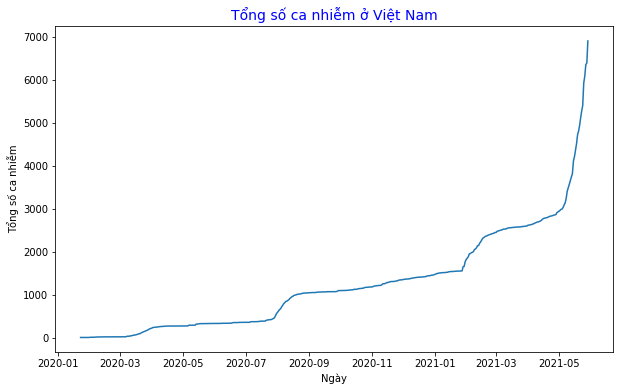

In [67]:
%%fsql
LOAD 'data/covid_19_data.parquet'
SELECT *
WHERE Country = 'Vietnam'
OUTPUT USING vebieudo(x_col='ObservationDate', y_col='Confirmed', 
                      title='Tổng số ca nhiễm ở Việt Nam', x_title='Ngày', y_title='Tổng số ca nhiễm')

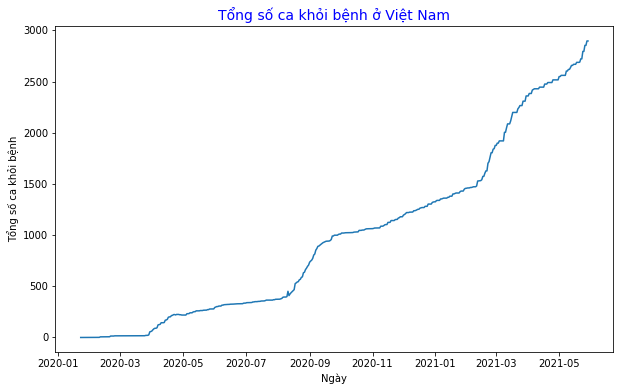

In [68]:
%%fsql
LOAD 'data/covid_19_data.parquet'
SELECT *
WHERE Country = 'Vietnam'
OUTPUT USING vebieudo(x_col='ObservationDate', y_col='Recovered', 
                      title='Tổng số ca khỏi bệnh ở Việt Nam', x_title='Ngày', y_title='Tổng số ca khỏi bệnh')

## TRANFORM

In [69]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
from typing import Iterable, Dict, Any

In [76]:
#schema: *, gender:int
def taocotgender(data:Iterable[Dict[str, Any]]) -> Iterable[Dict[str, Any]]:
    for row in data:
        row['gender'] = 1 if row['sex'] == 'female' else 0
        yield row

In [74]:
%%fsql
SELECT *
FROM df
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [77]:
%%fsql
SELECT *
FROM df
TRANSFORM USING taocotgender
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,gender:int
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,1
6,46,female,33.440,1,no,southeast,8240.58960,1
7,37,female,27.740,3,no,northwest,7281.50560,1
8,37,male,29.830,2,no,northeast,6406.41070,0
9,60,female,25.840,0,no,northwest,28923.13692,1


In [78]:
#schema: *, age_gender:str
def taocotagegender(data:pd.DataFrame, phancach:str) -> pd.DataFrame:
    data['age_gender'] = data['age'].astype(str) + phancach + data['sex']
    return data

In [79]:
%%fsql
SELECT *
FROM df
TRANSFORM USING taocotagegender(phancach='_')
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double,age_gender:str
0,19,female,27.900,0,yes,southwest,16884.92400,19_female
1,18,male,33.770,1,no,southeast,1725.55230,18_male
2,28,male,33.000,3,no,southeast,4449.46200,28_male
3,33,male,22.705,0,no,northwest,21984.47061,33_male
4,32,male,28.880,0,no,northwest,3866.85520,32_male
5,31,female,25.740,0,no,southeast,3756.62160,31_female
6,46,female,33.440,1,no,southeast,8240.58960,46_female
7,37,female,27.740,3,no,northwest,7281.50560,37_female
8,37,male,29.830,2,no,northeast,6406.41070,37_male
9,60,female,25.840,0,no,northwest,28923.13692,60_female


## Processor

In [80]:
def gopdata(data1:pd.DataFrame, data2:pd.DataFrame) -> pd.DataFrame:
    dfTemp = pd.concat([data1, data2], ignore_index=True)
    return dfTemp

In [85]:
%%fsql
df1 = SELECT * FROM df WHERE children=0 LIMIT 3
df2 = SELECT * FROM df WHERE children=1 LIMIT 3
PROCESS df1, df2 USING gopdata
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double
0,19,female,27.900,0,yes,southwest,16884.92400
1,33,male,22.705,0,no,northwest,21984.47061
2,32,male,28.880,0,no,northwest,3866.85520
3,18,male,33.770,1,no,southeast,1725.55230
4,46,female,33.440,1,no,southeast,8240.58960
5,19,male,24.600,1,no,southwest,1837.23700


In [91]:
%%fsql
SAMPLE 5 ROWS FROM df
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double
0,53,female,33.25,0,no,northeast,10564.88450
1,42,female,23.37,0,yes,northeast,19964.74630
2,50,male,44.77,1,no,southeast,9058.73030
3,40,female,29.30,4,no,southwest,15828.82173
4,47,male,19.57,1,no,northwest,8428.06930


In [92]:
%%fsql
SAMPLE 5 PERCENT FROM df
PRINT

,age:long,sex:str,bmi:double,children:long,smoker:str,region:str,charges:double
0,54,male,29.200,1,no,southwest,10436.09600
1,41,male,28.800,1,no,southwest,6282.23500
2,43,male,35.310,2,no,southeast,18806.14547
3,34,male,25.300,2,yes,southeast,18972.49500
4,47,male,38.940,2,yes,southeast,44202.65360
5,35,female,34.800,1,no,southwest,5246.04700
6,42,male,35.800,2,no,southwest,7160.09400
7,22,male,35.600,0,yes,southwest,35585.57600
8,45,male,22.895,0,yes,northeast,35069.37452
9,23,male,23.845,0,no,northeast,2395.17155
